# ST0249 AI & Machine Learning Assignment 2 
## PART A: Regression 
## Topic: King County House Price Prediction

#### Name: Choo Weng Yan 
#### Class: DIT/FT/2A/14
#### Admission Number: p1940208 

In [52]:
# Suppress Future Warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [53]:
import sklearn
from sklearn import datasets 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import platform
from scipy.stats import norm, skew, probplot
%matplotlib inline

#show the versions of the libraries that are currently in use
message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=0.20.3
Numpy version=1.16.2
Pandas version=0.23.4
Seaborn version=0.9.0
Python version=3.6.6


In [54]:
#Import train data
df_train = pd.read_csv("kc_house_data.csv")
df_train[:2]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


### How is your prediction task defined? And what is the meaning of the output variable?

My prediction task is to predict the prices of the housing in King County from May 2014 to May 2015 based on the variables given in the dataset. 

The meaning of the output variable is the 'price' column, the price of the house sold. 

### Did you bring in any additional sources of data?

Before starting this assignment, I have done some background research on King County which is a county located in United States of Washington. It also says that King County is one of three Washington counties that are included in the Seattle–Tacoma–Bellevue metropolitan statistical area.

For Seattle, it is Washington State’s largest city, it’s home to a large tech industry, with Microsoft and Amazon headquartered in its metropolitan area. I have also went to the Wikipedia to find out more about the country so that I can get more insights from it.

# Exploratory Data Analysis 

In [4]:
#Showing all the information about the dataset

msg="Information of the Train Dataset"
print("*"*len(msg))
print(msg)
print("*"*len(msg))
print(df_train.info())
print()

msg="Columns in the Train Dataset"
print("*"*len(msg))
print(msg)
print("*"*len(msg))
print(df_train.columns)
print()

msg="Shape of the Train Dataset"
print("*"*len(msg))
print(msg)
print("*"*len(msg))
print(df_train.shape)
print()

msg="Descriptive statistical summary of the train dataset is shown below: "
print("*"*len(msg))
print(msg)
print("*"*len(msg))
df_train.describe()

********************************
Information of the Train Dataset
********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       2161

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
#Check the missing values 

df_train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [55]:
#drop id column (unwanted column)
df_train=df_train.drop(['id'],axis=1)

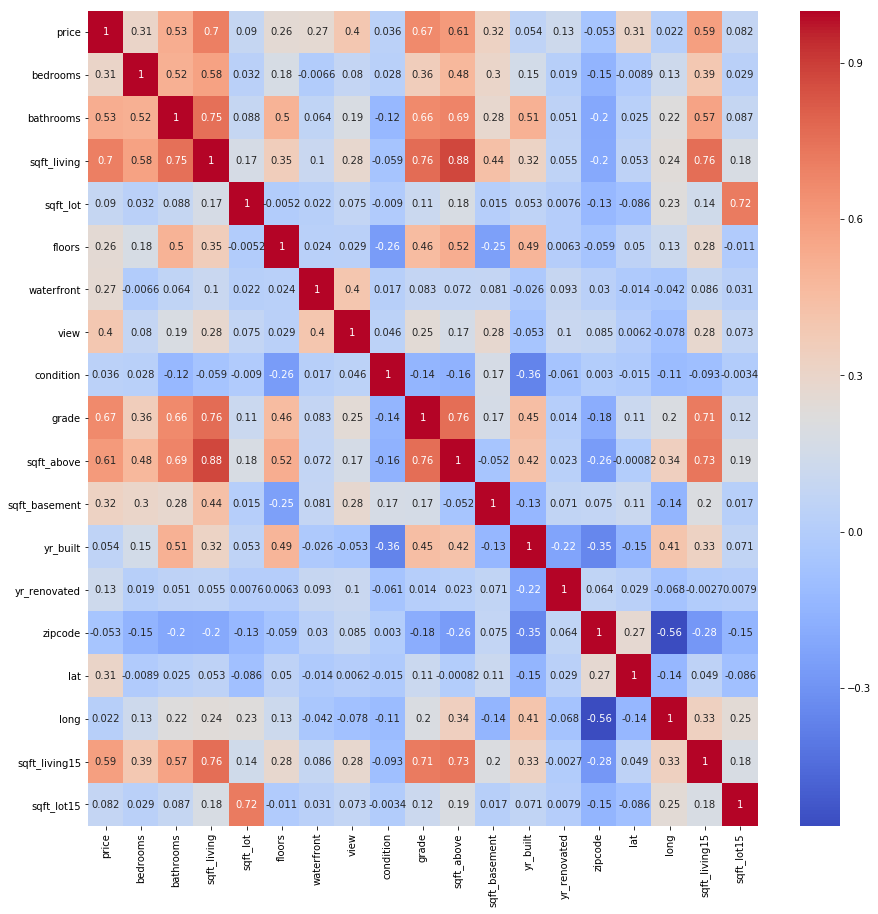

In [53]:
#heatmap (correlation analysis) -overview 
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(),annot=True,cmap='coolwarm')

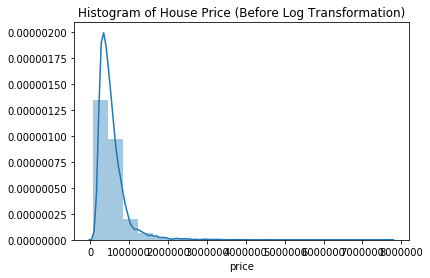

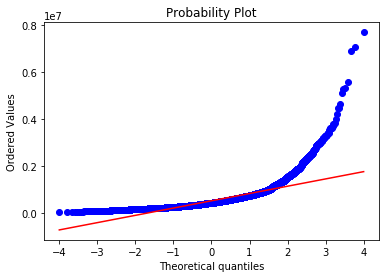

In [8]:
sns.distplot(df_train['price'], kde=True, bins=20)
plt.title('Histogram of House Price (Before Log Transformation)');

plt.figure()
res = probplot(df_train['price'], plot=plt);

The graph above shows the distribution of the house price in the dataset. A histogram with a normal curve of the data fitted to it to show how it differs from the normal curve. 
Further below is a probability plot that further shows that the variable diverges from the normal distribution.

The graph shows that the 'price' variable is right-skewed. 
Hence, logarithmic transformation should be applied using numpy’s np.log method to rectify this problem. 

In [56]:
#log transformation of target variable 
df_train['price_log'] = np.log(df_train['price'])
df_train['price_log'] .head()

0    12.309982
1    13.195614
2    12.100712
3    13.311329
4    13.142166
Name: price_log, dtype: float64

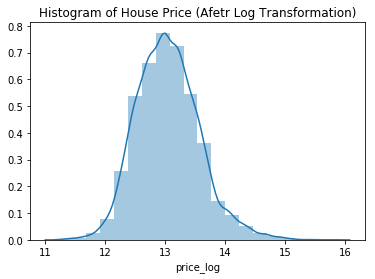

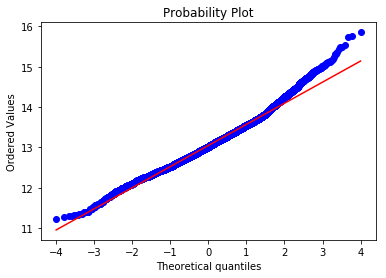

In [10]:
sns.distplot(df_train['price_log'], kde=True, bins=20)
plt.title('Histogram of House Price (Afetr Log Transformation)');

plt.figure()
res_log = probplot(df_train['price_log'], plot=plt);

The histogram and probability plot above shows the distribution of the house price variable after log transformation. 

Now, it shows that the price is normally distributed. 

In the dataset, there were several measures of square footage includes in the variables. I used the ‘sqft_living’ variable because it includes both above ground and basement square footage. I used a regplot for this visualization.



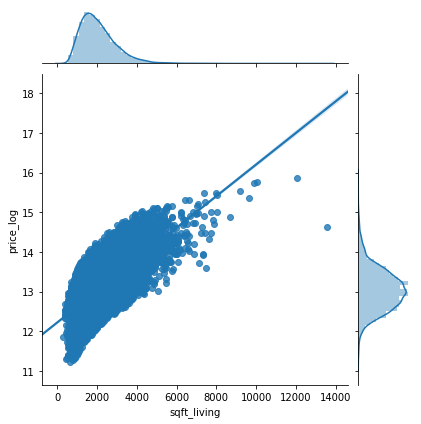

In [10]:
#living area vs sales price 
sns.jointplot(x=df_train['sqft_living'], y=df_train['price_log'], kind='reg')

The Joint plot shows the relationship between the house price and the sqft_living in King County. 

It shows that there is a positive correlation between price and sqft_living. However there is outliers in the sqft_living as there are a few points that are far away from the regression plot.

Hence, I have decided to remove the outliers for the sqft_living where the values are higher than 12000 at the next section

Text(0.5, 1.0, 'House Price based on the Number of Bedrooms')

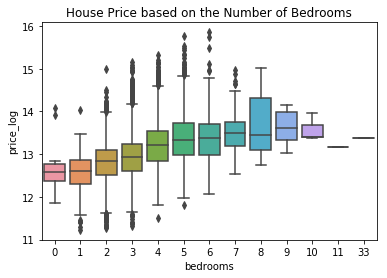

In [10]:
#bedrooms and house price (outliers to be removed)
sns.boxplot(x=df_train['bedrooms'], y=df_train['price_log'])
plt.title('House Price based on the Number of Bedrooms')

The boxplot on the above shows the distribution of the house price based on the number of bedrooms in the house. Based on the graph, it shows that there are lesser houses that contains 10 to 33 bedrooms in one house.

Hence, I have decided to remove them in the next section (Feature Engineering - Remove Outliers) so that it will not affect the house price prediction later.

Text(0.5, 1.0, 'House Price based on Number of Bathrooms')

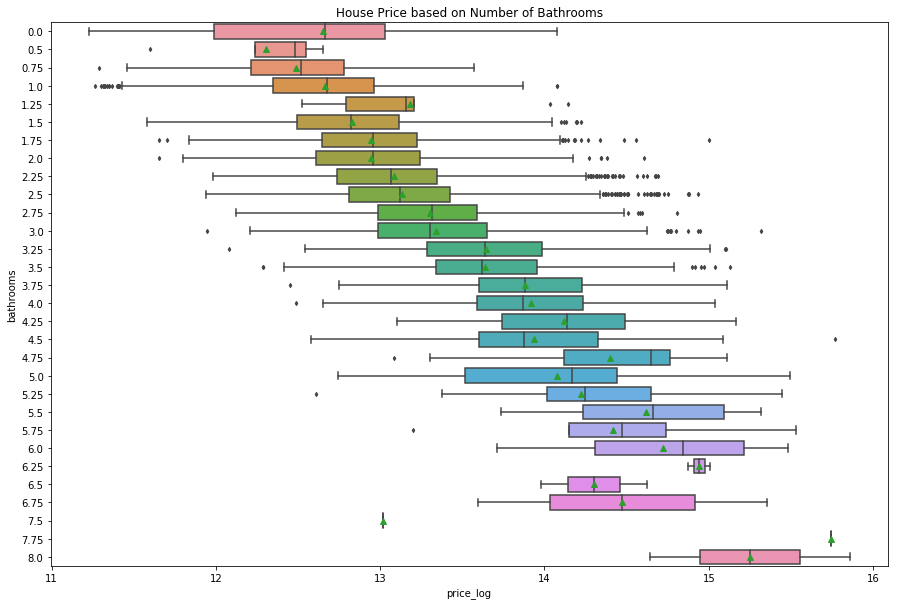

In [13]:
# bathrooms and price 
plt.figure(figsize=(15,10))
sns.boxplot(y = 'bathrooms', x = 'price_log', data = df_train,
            width = 0.8,orient = 'h', showmeans = True, fliersize = 3)
plt.title('House Price based on Number of Bathrooms')

The boxplot on the left shows the distribution of House Price based on the number of bathrooms in the house. 

Based on the graph, the data shows that most of the house price increases when the number of bathrooms in the house increases. 

It shows that the house with 8 bathrooms have the highest average house price among all the other number of bathrooms. 

Text(0.5, 1.0, 'House Price based on the View')

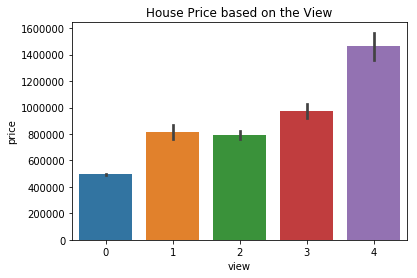

In [14]:
#view and houseprice 
sns.barplot(x=df_train['view'], y=df_train['price'])
plt.title('House Price based on the View')

The bar chart above shows the price of the house based on the quality of view in King County. 

Based on the chart, it shows that the house with the best view (4) has the average highest house price, the house price for View 1 ad View 2 are about the same. While the house with the worst view (View 0) has the lowest house price among all the 5 views. 

Text(0.5, 1.0, 'House Price based on House Condition')

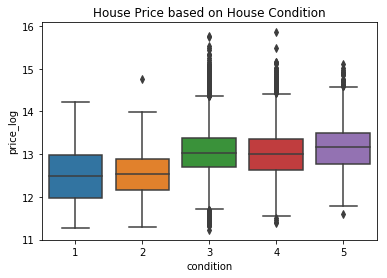

In [15]:
#condition and house price 
sns.boxplot(x=df_train['condition'], y=df_train['price_log'])
plt.title('House Price based on House Condition')

The boxplot on the right shows the price of the house based on the house condition in King County. 

Based on the graph, it shows that house with the best condition (Condition 5) has the average highest house price. Besides, the average house price for Condition 3 and 4 are about the same. 

While the house with the worst condition (Condition 1) has the average lowest house price, which is slightly lower than Condition 2. 

Text(0.5, 1.0, 'House Price based on Existance of Waterfront')

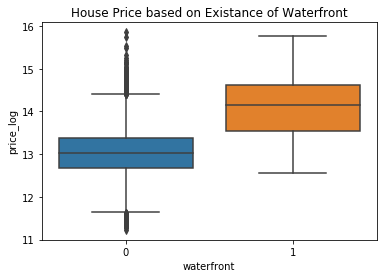

In [17]:
#waterfront and house price
sns.boxplot(x=df_train['waterfront'], y=df_train['price_log'])
plt.title('House Price based on Existance of Waterfront')

The boxplot on the left shows the price of the house based on the existence of waterfront view.

Based on the graph, it shows that the house that contains a waterfront view will have an average higher house price compared to the houses that do not have a waterfront 

Text(0.5, 1.0, 'House Price based on Grade')

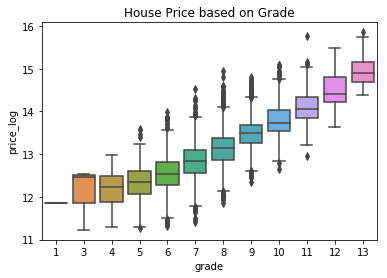

In [18]:
#grade and house price
sns.boxplot(x=df_train['grade'], y=df_train['price_log'])
plt.title('House Price based on Grade')

The boxplot on the above shows the price of the house based on the grade (quality level of construction and design of the house)

Based on the graph, it shows that the house with higher quality has an average higher house price. It shows that the house with the highest grade (Grade 13) has the highest house price among all the other grades while for the house with the lowest grade has the lowest house price. 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Price of the House over the Year Built')

<Figure size 1080x720 with 0 Axes>

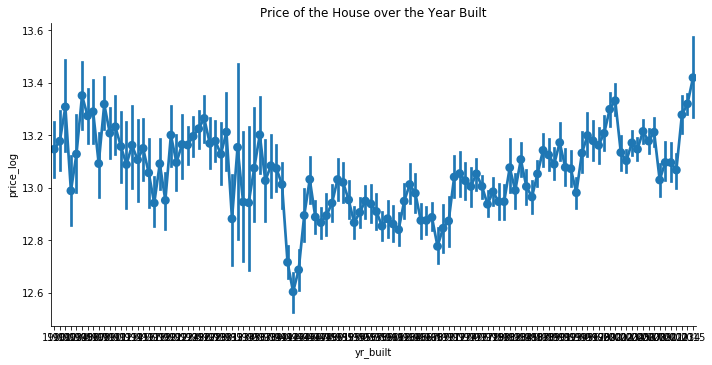

In [20]:
#yr built and house price
plt.figure(figsize=(15,10))
sns.factorplot('yr_built','price_log', data=df_train, aspect = 2.0, )
plt.title('Price of the House over the Year Built')

The factor plot above shows the price of the house based on its year built from 1900 to 2015.

It shows that the price of the house is was not consistent in the 1900s as the price increased and dropped over the years. However, from the year of 2000 onwards, it shows that the price of the house increases steadily over the years although there was a small drop before the end of the year. 

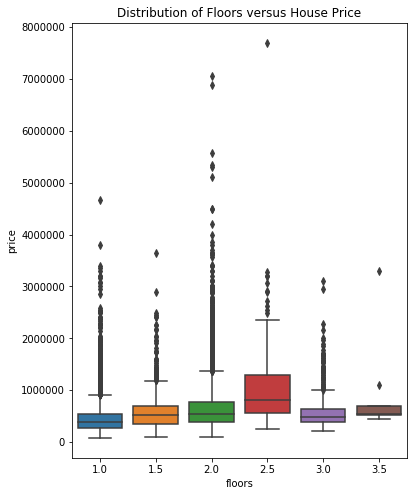

In [38]:
#floors and house price 
plt.figure(figsize=(6,8))
sns.boxplot( x=df_train["floors"], y=df_train["price"] )
plt.title("Distribution of Floors versus House Price")
plt.show();

The boxplot above shows the house price based on the number of floors in the house.

Before doing any data analysis on it, I have decided to remove the outliers of the price on the next section under Feature Engineerng - Remove Outliers

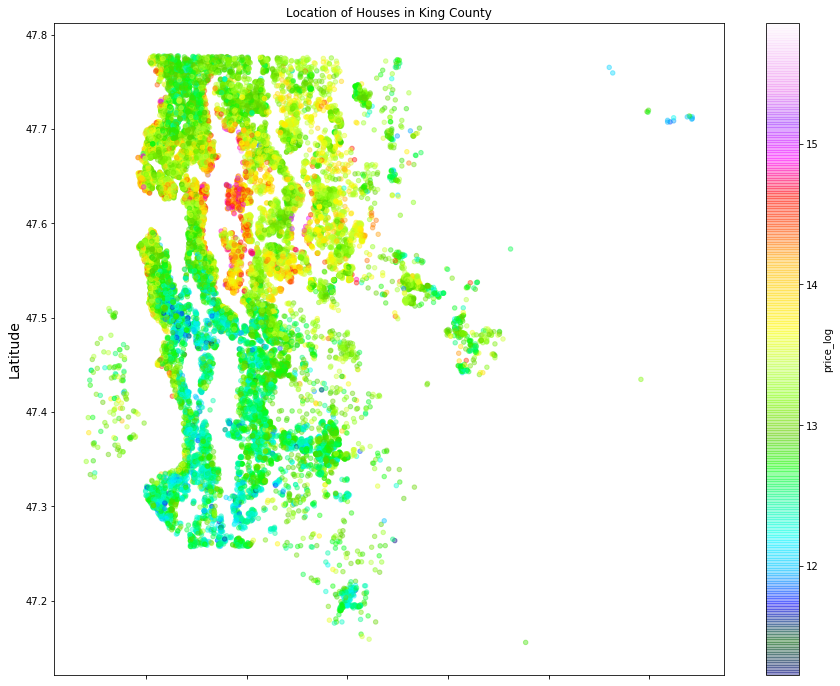

In [59]:
df_train.plot(kind="scatter", x='long', y='lat', c='price_log', cmap=plt.get_cmap("gist_ncar"), colorbar=True, alpha=0.4, figsize=(15,12))

plt.ylabel('Latitude', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.title('Location of Houses in King County')
plt.show()

The scatterplot above shows the house location in King County.

Based on the scatterplot, it shows that most of the red data points are in the top half of the plot. This shows that the price of the house increases from South to North across the latitude but it shows a little variation as we move across the longitude.

Based on the map of King County and the scatterplot above, it shows that houses in Seattle and Bellevue located along the coast in the Midwest region of King County have the highest house price compared to other house located in other cities. 

## Feature Engineering 

### How do you represent your data as features?

After Exploratory Data Analysis, I have represented the data in the dataset by doing feature engineering so that the data can have bigger influence on the performance of the regression models.

### Did you process the features in any way?

Here, I have processed the features by grouping and classifying them into categorical and numeriacal features, combining of the original features in the dataset and came out with a new features.

Besides, I have also removed some outliers and standardized the features so that all the data is normally distributed. 

The codes are as below: 

#### Add New Feature - Total Square Footage (sqft_basement + sqft_above)

A new feature ‘total_sqft’ is created, which is the sum of ‘sqft_basement’ and ‘sqft_above’ variables.  

In the feature, the purpose of it is to find out what is the price of the house based on the total square footage of the interior housing space. The reason that I want to combine these two features (sqft_basement, sqft_above) is because not all houses in King County contains housing space below the ground level (basement).

In [21]:
#total sqft ( area of basement + above)

df_train['total_sqft'] = df_train['sqft_basement'] + df_train['sqft_above']
df_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log,total_sqft
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982,1180
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614,2570
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100712,770
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329,1960
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142166,1680


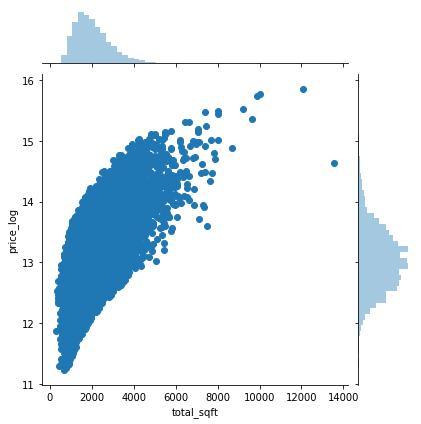

In [22]:
sns.jointplot(x=df_train['total_sqft'], y=df_train['price_log'])

The joint plot shows the price of the house based on its total square footage. 

Based on the graph, it shows that most of the house price increases when the total square footage of the interior housing space increases. 

#### Add New Feature - House Age (new_date - yr_built)

In [23]:
#new date & house_age 
#year built - year bought (age of the house when it is sold )

#extract only the year from date string
df_train['new_date'] = df_train['date'].astype(str).str[0:4]
df_train['new_date'].head()

#change the date type to integer
df_train['new_date']= df_train['new_date'].astype(int)

#age of the house since it is built 
df_train['house_age'] = df_train['new_date'] - df_train['yr_built']
df_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log,total_sqft,new_date,house_age
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,12.309982,1180,2014,59
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,13.195614,2570,2014,63
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,12.100712,770,2015,82
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,13.311329,1960,2014,49
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,13.142166,1680,2015,28


- A new feature called ‘new_date’ is created. It is extracted from the ‘date’ column in the csv so that I am able to get the year of the house when it is sold out and thus I am able to create another feature from here. 

- Besides, another new feature called ‘house_age’ is being created as well. This feature is created by getting the difference between the ‘yr_built’ and the ‘new_date’ variables in the table. 

The purpose of having this feature is to give information for us to know what is the age of the house when it was being sold. 

#### Add New Feature - Renovated, newReno, newBuild 

In [27]:
# get some insights of the features that will be used for feature engineering 

#year built
print('Year Built Min: ', df_train['yr_built'].min())
print('Year Built Max: ', df_train['yr_built'].max())
print('Year Built Mean: ', np.mean(df_train['yr_built'])) 
print()

#year renovated 
print('Year Renovated Min: ', df_train.loc[df_train['yr_renovated'] > 0,'yr_renovated'].min()) #min year renovated excluding not reno
print('Year Renovated Max: ', df_train['yr_renovated'].max()) #max year renovated excluding not reno
print('Year Renovated Mean: ', (np.mean(df_train.loc[df_train['yr_renovated'] > 0,'yr_renovated']))) #mean year renovated excluding not reno

Year Built Min:  1900
Year Built Max:  2015
Year Built Mean:  1971.0102739726028

Year Renovated Min:  1934
Year Renovated Max:  2015
Year Renovated Mean:  1995.8236582694415


In [28]:
#create features

#renovated 
df_train.loc[df_train.loc[:,'yr_renovated'] > 0 , "renovated"] = 1
df_train.loc[df_train.loc[:,'yr_renovated'] == 0, "renovated"] = 0

#new renovation
df_train.loc[df_train.loc[:,'yr_renovated'] > 1995 , "newReno"] = 1
df_train.loc[df_train.loc[:,'yr_renovated'] < 1996, "newReno"] = 0

#newly built 
df_train.loc[df_train.loc[:,'yr_built'] > 1970 , "newBuild"] = 1
df_train.loc[df_train.loc[:,'yr_built'] < 1971, "newBuild"] = 0

#set the features as integer 
df_train['renovated']=df_train['renovated'].astype(int)
df_train['newReno']=df_train['newReno'].astype(int)
df_train['newBuild']=df_train['newBuild'].astype(int)

Text(0.5, 1.0, 'House Price based on New Renovation')

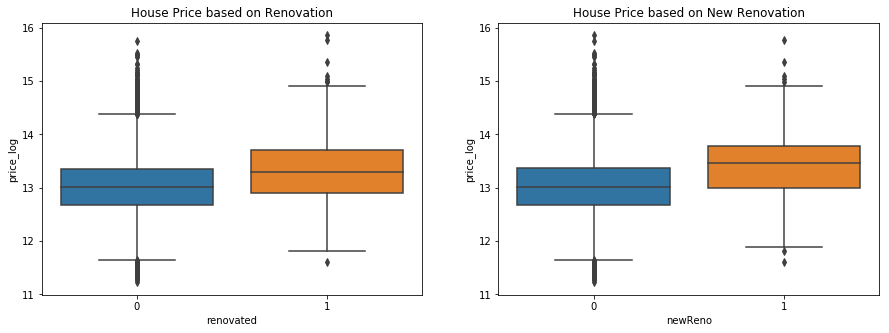

In [32]:
#reno and house price 
fig, ax =plt.subplots(1,2, figsize=(15,5))
#fig.set_size_inches(15, 5)
sns.boxplot(x=df_train['renovated'],y=df_train['price_log'], ax=ax[0])
sns.boxplot(x=df_train['newReno'],y=df_train['price_log'], ax=ax[1])

ax[0].set_title('House Price based on Renovation')
ax[1].set_title('House Price based on New Renovation')

New features named ‘renovated’ and ‘newReno’ are created. ‘newReno’ is created by filtering the mean year of ‘yr_renovated’ column. Hence, if the yr_renovated is more than the mean year, it will be classified as new renovated house and vice versa. 

Based on the both boxplots above, price of the house that are renovated before is higher than the house that has not been renovated before the house is being sold. Besides, it shows that the average price of the newly renovated house is slightly higher than the house that are not newly renovated.

Text(0.5, 1.0, 'House Price based on New Build')

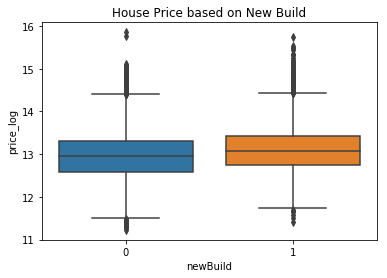

In [34]:
#new build and house price
sns.boxplot(x=df_train['newBuild'],y=df_train['price_log'])
plt.title('House Price based on New Build')

A new feature ‘newBuild' is created, which is calculated from the ‘yr_build’ column in the data. It is created by filtering the mean of ‘yr_build’. Hence, if the value in the ‘yr_build’ column is higher than the mean year built, it will be classified as newly build house and vice versa.

The purpose of this feature is to see if the price of the house will increase if the house is nearly built.

The boxplot on the left shows the distribution of the house price based on the newly built house. 

Based on the graph, it shows that the average price of the newly built houses is slightly higher than the house that are not newly built. 
However, it can be seen that the maximum of the house price between newly built houses and not newly built house are about the same. 

#### Add New Feature - Landbuild_ratio 

Another new feature named ‘landbuild_ratio’ is created. It is calculated by dividing the ‘sqft_lot’ with the ‘sqft_living’ in the data table. 

The purpose of having this feature is to see how premium is the house as if the land build ratio is low, which means the property is already in used at full capacity while if the ratio is high, which means the property is not used to its fullest potential.

In [36]:
#calculate the land to building ratio (high, property isnt being used to its fullest potential, low, property is already at full capacity )
#ratio of lot and living (to see how premium is the house)
df_train['landbuild_ratio'] = df_train['sqft_lot']/df_train['sqft_living']
df_train['landbuild_ratio'].describe()

count    21608.000000
mean         7.464954
std         22.966046
min          0.214876
25%          2.453970
50%          4.039698
75%          6.387518
max       1640.554930
Name: landbuild_ratio, dtype: float64

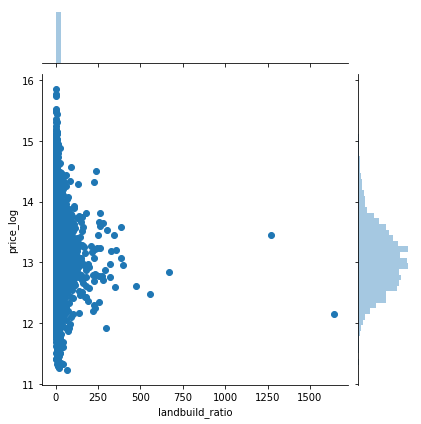

In [37]:
sns.jointplot(x=df_train['landbuild_ratio'], y=df_train['price_log'])

The joint plot above shows the land build ratio and the house price. 

Based on the graph, it shows that most of the land build ratio of the house are below 250 while a few of them have higher land build ratio than others. 
This shows that most of the houses in King County are in used at its full potential. 

#### Remove Outliers

In [39]:
#detecting outliers (floors)
from scipy import stats
df_train = df_train[(np.abs(stats.zscore(df_train.price)) < 3)]

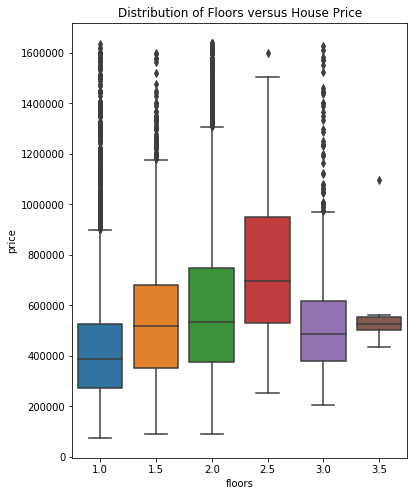

In [41]:
plt.figure(figsize=(6,8))
sns.boxplot( x=df_train["floors"], y=df_train["price"] )
plt.title("Distribution of Floors versus House Price")
plt.show();

Based on the graph above, it shows the maximum price is only $1,600,000 after removing the outliers.

According to the graph, it shows that the house that contains 2.5 floors have the average highest house price while the house that has only one floor have the average lowest house price.

In [42]:
#remove outliers (bedrooms)
df_train = df_train.drop(df_train[df_train.bedrooms>=10].index)

Text(0.5, 1.0, 'House Price based on the Number of Bedrooms')

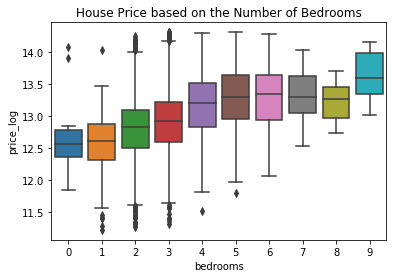

In [43]:
sns.boxplot(x=df_train['bedrooms'], y=df_train['price_log'])
plt.title('House Price based on the Number of Bedrooms')

The boxplot above shows the distribution of house price based on the number of bedrooms after removing the number of bedrooms which are more than 10. 

Based on the graph, it shows that the price increases when the number of bedrooms increases. 

In [44]:
#remove outliers (sqft_living)
df_train = df_train.drop(df_train[df_train.sqft_living>=12000].index)

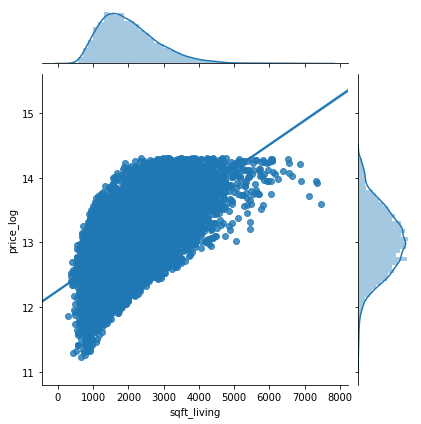

In [45]:
#living area vs sales price 
sns.jointplot(x=df_train['sqft_living'], y=df_train['price_log'], kind='reg')

This joint plot on the right shows the relationship between house price and sqft_living after removing the outliers. 

According to the graph, it shows that both variables are quite normally distributed now and the points of sqft_living are quite close to each other. 

Hence, it shows that the more the square footage of the apartments interior living space, the higher the house price


#### Standardized Skewed Features

In [80]:
# finding skewed features

numerical_feats = df_train.dtypes[df_train.dtypes != 'object'].index

# checking the skewness in all the numerical features
skewed_feats = df_train[numerical_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_feats})

# checking the head of skewness dataset
skewness

,skew
landbuild_ratio,30.725863
waterfront,15.081806
sqft_lot,13.185052
sqft_lot15,9.562078
newReno,6.382701
yr_renovated,4.689348
renovated,4.688848
view,3.600642
sqft_basement,1.454485
price,1.386258


In [81]:
# defining skewed features
skewed_features = ['landbuild_ratio','sqft_lot','sqft_lot15','yr_renovated','sqft_basement','sqft_above','sqft_living15','sqft_living','total_area']

#standardized data using log transformation
df_train[skewed_features] = np.log1p(df_train[skewed_features])

In [82]:
df_train.corr()['price_log'].sort_values(ascending=False)

price_log          1.000000
price              0.951043
grade              0.666262
sqft_living        0.642223
total_area         0.642223
sqft_living15      0.580311
sqft_above         0.548880
bathrooms          0.506408
lat                0.468643
bedrooms           0.329471
floors             0.301194
view               0.278497
sqft_basement      0.219938
newBuild           0.135210
sqft_lot           0.104903
newReno            0.097362
yr_renovated       0.093512
renovated          0.093461
sqft_lot15         0.092121
waterfront         0.081579
yr_built           0.081547
long               0.061496
condition          0.035394
new_date           0.002929
zipcode           -0.021694
house_age         -0.081492
landbuild_ratio   -0.182028
Name: price_log, dtype: float64

In [47]:
#remove unwanted columns 
houseprice_df=df_train.drop(['date','price','yr_renovated','yr_built','new_date','zipcode','long', 'renovated','sqft_lot15'],axis=1)

houseprice_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,sqft_living15,price_log,total_sqft,house_age,newReno,newBuild,landbuild_ratio
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,1340,12.309982,1180,59,0,0,4.788136
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,1690,13.195614,2570,63,0,0,2.817899
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,2720,12.100712,770,82,0,0,12.987013
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,1360,13.311329,1960,49,0,0,2.551020
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,1800,13.142166,1680,28,0,1,4.809524


Before training the model, some of the unwanted columns will be dropped and parse into a new data frame.

Columns dropped are Id, date, yr_renovated, yr_built, new_date, zipcode, long, renovated and sqft_lot15

Reason of dropping the columns: 
- Based on the correlation list above, I have decided to drop the columns that have the correlation lesser than 0.07 

In [48]:
# Show categorical varibles and numeric variables

num_vars=list(houseprice_df.columns[houseprice_df.dtypes != "object"])
cat_vars=list(houseprice_df.columns[houseprice_df.dtypes == "object"])
print("Categorical Variables: ",cat_vars)
print("Numerical Variables: ",num_vars)

Categorical Variables:  []
Numerical Variables:  ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15', 'price_log', 'total_sqft', 'house_age', 'newReno', 'newBuild', 'landbuild_ratio']


The features are classified into different categories which are the categorical variables and the numeric variables in order to produce dummy variables for the category variables. 

Based on the printed output above, it shows that all the features are in numerical variables. Hence, there is no a need to generate dummy variables. 

# Train Model 

### Split Data into Train and Test Sets 

In [49]:
from sklearn.model_selection import train_test_split
y = houseprice_df["price_log"].values
X = houseprice_df.drop(["price_log"],axis=1).values

#split data into 80% traning set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=45)

In [50]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

Using TensorFlow backend.


### Train Model with Algorithm 

#### Linear Regression 

In [51]:
lr_model = LinearRegression()

#fit logistic regression model to the data 
lr_model.fit(X_train, y_train)

#make predictions 
Y_pred_LR = lr_model.predict(X_test)
y_train_pred_LR = lr_model.predict(X_train)
print(lr_model)

#judge the quality of the prediction(fit) on data 
model_score=lr_model.score(X_test, y_test)
print("Model Score: ",model_score)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred_LR))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred_LR))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred_LR)))
print("\n")
# evaluate model on training dataset
rmse_train_lr = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_LR))
r2_train_lr = round(r2_score(y_train, y_train_pred_LR),2)

# evaluate model on test and train dataset
rmse_test_lr = np.sqrt(metrics.mean_squared_error(y_test, Y_pred_LR))
r2_lr =  round(r2_score(y_test, Y_pred_LR),2)

print("The model performance for the train set (Linear Regression)")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train_lr))
print("R2 score of training set is {}".format(r2_train_lr))

print("\n")
  
print("The model performance for the test set (Linear Regression)")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test_lr))
print("R2 score of test set is {}".format(r2_lr))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Model Score:  0.7411423247845068
Mean Absolute Error: 0.1903395893272835
Mean Squared Error: 0.06086596553253989
Root Mean Squared Error: 0.24671028663705916


The model performance for the train set (Linear Regression)
-------------------------------------------
RMSE of training set is 0.24821425084121407
R2 score of training set is 0.74


The model performance for the test set (Linear Regression)
-------------------------------------------
RMSE of test set is 0.24671028663705916
R2 score of test set is 0.74


Text(0.5, 1.0, 'LinearRegression Model')

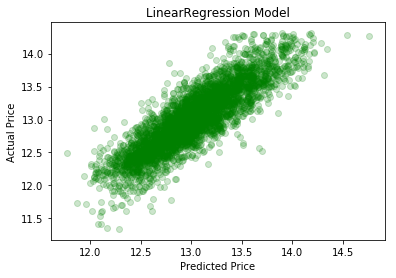

In [72]:
actual_values = y_test
predictions = lr_model.predict(X_test)
plt.scatter(predictions, actual_values, alpha=.20,
            color='g') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('LinearRegression Model')

#### Polynomial Regression 

In [88]:
poly_model = PolynomialFeatures(degree=2)
X_poly = poly_model.fit_transform(X)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_poly, y, test_size=0.4, random_state=11)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train1,y_train1)
pred = lin_reg.predict(X_test1)
y_train_pred = lin_reg.predict(X_train1)

#judge the quality of the prediction(fit) on data 
model_score1=lin_reg.score(X_test1, y_test1)
print("Model Score: ",model_score1)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, pred)))

print("\n")

rmse_train_P = np.sqrt(metrics.mean_squared_error(y_train1, y_train_pred))
r2_train_P = round(r2_score(y_train1, y_train_pred),2)

print("The model performance for the train set (Polynomial Regression)")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train_P))
print("R2 score of training set is {}".format(r2_train_P))

#coefficient of determination (r^2)
rmse_test_P = np.sqrt(metrics.mean_squared_error(y_test1, pred))
r2_P = round(r2_score(y_test1, pred),2)

print("\n")
  
print("The model performance for the test set (Polynomial Regression)")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test_P))
print("R2 score of test set is {}".format(r2_P))

# print_evaluate(y_test, pred)

Model Score:  0.7913416158759798
Mean Absolute Error: 0.16788004980374768
Mean Squared Error: 0.04955170677788392
Root Mean Squared Error: 0.22260212662480094


The model performance for the train set (Polynomial Regression)
-------------------------------------------
RMSE of training set is 0.21710785141846276
R2 score of training set is 0.8


The model performance for the test set (Polynomial Regression)
-------------------------------------------
RMSE of test set is 0.22260212662480094
R2 score of test set is 0.79


#### Gradint Boosting Regression

In [89]:
gbr_model= GradientBoostingRegressor()

gbr_model.fit(X_train, y_train)

Y_pred_GBR = gbr_model.predict(X_test)
Y_train_pred_GBR = gbr_model.predict(X_train)
print(gbr_model)

gbr_score= gbr_model.score(X_test, y_test)
print("Model Score",gbr_score)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred_GBR))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred_GBR))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred_GBR)))

print("\n")

# evaluate model on training and test dataset
rmse_train_gbr = np.sqrt(metrics.mean_squared_error(y_train, Y_train_pred_GBR))
r2_train_gbr = round(r2_score(y_train, Y_train_pred_GBR),2)

#coefficient of determination (r^2)
rmse_test_gbr = np.sqrt(metrics.mean_squared_error(y_test, Y_pred_GBR))
r2_gbr =  round(r2_score(y_test, Y_pred_GBR),2)

print("The model performance for the train set (Gradient Boosting Regression)")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train_gbr))
print("R2 score of training set is {}".format(r2_train_gbr))

print("\n")
  
print("The model performance for the test set (Gradient Boosting Regression)")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test_gbr))
print("R2 score of test set is {}".format(r2_gbr))


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
Model Score 0.8490754225990444
Mean Absolute Error: 0.13948078337598757
Mean Squared Error: 0.03548733920465149
Root Mean Squared Error: 0.18838083555566762


The model performance for the train set (Gradient Boosting Regression)
-------------------------------------------
RMSE of training set is 0.1833607286321212
R2 score of training set is 0.86


The model performance for the test set (Gradient Boosting Regression)
-------------------------------------------
RMSE o

#### Decision Tree Regressor 

In [75]:
dt_model= DecisionTreeRegressor()

dt_model.fit(X_train, y_train)

Y_pred_DT = dt_model.predict(X_test)
Y_train_pred_DT = dt_model.predict(X_train)
print(dt_model)

cvs_dt = cross_val_score(dt_model,X=X_train,y=y_train,
                        scoring="r2", cv=10)

dt_score= dt_model.score(X_test, y_test)
print("Model Score",dt_score)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred_DT))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred_DT))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred_DT)))

print("\n")

# evaluate model on training dataset
rmse_train_dt = np.sqrt(metrics.mean_squared_error(y_train, Y_train_pred_DT))
r2_train_dt = round(r2_score(y_train, Y_train_pred_DT),2)

# evaluate model on test dataset
rmse_test_dt = np.sqrt(metrics.mean_squared_error(y_test, Y_pred_DT))
r2_dt =  round(r2_score(y_test, Y_pred_DT),2)

print("The model performance for the train set (Decision Tree Regressor)")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train_dt))
print("R2 score of training set is {}".format(r2_train_dt))

print("\n")
  
print("The model performance for the test set (Decision Tree Regressor)")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test_dt))
print("R2 score of test set is {}".format(r2_dt))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
Model Score 0.6989773466250664
Mean Absolute Error: 0.19212841920556153
Mean Squared Error: 0.07078034070104251
Root Mean Squared Error: 0.26604574926324703


The model performance for the train set (Decision Tree Regressor)
-------------------------------------------
RMSE of training set is 0.011507389284937204
R2 score of training set is 1.0


The model performance for the test set (Decision Tree Regressor)
-------------------------------------------
RMSE of test set is 0.26604574926324703
R2 score of test set is 0.7


#### Ridge Resgression 

In [76]:
rr_model= Ridge()

rr_model.fit(X_train, y_train)

Y_pred_RR = rr_model.predict(X_test)
Y_train_pred_RR = rr_model.predict(X_train)
print(rr_model)

rr_score= rr_model.score(X_test, y_test)
print("Model Score",rr_score)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred_RR))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred_RR))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred_RR)))

print("\n")

# evaluate model on training dataset
rmse_train_RR = np.sqrt(metrics.mean_squared_error(y_train, Y_train_pred_RR))
r2_train_RR = round(r2_score(y_train, Y_train_pred_RR),2)

# evaluate model on test dataset
rmse_test_RR = np.sqrt(metrics.mean_squared_error(y_test, Y_pred_RR))
r2_RR =  round(r2_score(y_test, Y_pred_RR),2)

print("The model performance for the train set (Ridge Regression)")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train_RR))
print("R2 score of training set is {}".format(r2_train_RR))

print("\n")
  
print("The model performance for the test set (Ridge Regression)")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test_RR))
print("R2 score of test set is {}".format(r2_RR))


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Model Score 0.7504179463012255
Mean Absolute Error: 0.18659190186308022
Mean Squared Error: 0.05868496139944053
Root Mean Squared Error: 0.24224979133002475


The model performance for the train set (Ridge Regression)
-------------------------------------------
RMSE of training set is 0.24195249344202718
R2 score of training set is 0.75


The model performance for the test set (Ridge Regression)
-------------------------------------------
RMSE of test set is 0.24224979133002475
R2 score of test set is 0.75


#### Random Forest Regressor 

In [77]:
rf_model= RandomForestRegressor()

#fit random forest model to the data 
rf_model.fit(X_train, y_train)

Y_pred_RF = rf_model.predict(X_test)
Y_train_pred_RF = rf_model.predict(X_train)
print(rf_model)

rf_score= rf_model.score(X_test, y_test)
print("Model Score",rf_score)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred_RF))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred_RF))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred_RF)))

# evaluate model on training dataset
rmse_train_RF = np.sqrt(metrics.mean_squared_error(y_train, Y_train_pred_RF))
r2_train_RF = round(r2_score(y_train, Y_train_pred_RF),2)

# evaluate model on test dataset
rmse_test_RF = np.sqrt(metrics.mean_squared_error(y_test, Y_pred_RF))
r2_RF =  round(r2_score(y_test, Y_pred_RF),2)

print("The model performance for the train set (Random Forest Regressor)")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train_RF))
print("R2 score of training set is {}".format(r2_train_RF))

print("\n")
  
print("The model performance for the test set (Random Forest Regressor)")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test_RF))
print("R2 score of test set is {}".format(r2_RF))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Model Score 0.8375378541395747
Mean Absolute Error: 0.14153841215788399
Mean Squared Error: 0.03820020156656059
Root Mean Squared Error: 0.19544871850836115
The model performance for the train set (Random Forest Regressor)
-------------------------------------------
RMSE of training set is 0.08318937383342592
R2 score of training set is 0.97


The model performance for the test set (Random Forest Regressor)
-------------------------------------------
RMSE of test set is 0.19544871850836115
R2 score of test set is 0.84


#### Support Vector Regressor 

In [78]:
svr_model =SVR(kernel='rbf')

svr_model.fit(X_train, y_train)

Y_pred_SVR = svr_model.predict(X_test)
Y_train_pred_SVR = svr_model.predict(X_train)
print(svr_model)

svr_score= svr_model.score(X_test, y_test)
print("Model Score",svr_score)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred_SVR))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_pred_SVR))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred_SVR)))

# evaluate model on training dataset
rmse_train_SVR = np.sqrt(metrics.mean_squared_error(y_train, Y_train_pred_SVR))
r2_train_SVR = r2_score(y_train, Y_train_pred_SVR)

# evaluate model on test dataset
rmse_test_SVR = np.sqrt(metrics.mean_squared_error(y_test, Y_pred_SVR))
r2_SVR =  round(r2_score(y_test, Y_pred_SVR),2)

print("The model performance for the train set (Support Vector Regressor)")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train_SVR))
print("R2 score of training set is {}".format(r2_train_SVR))

print("\n")
  
print("The model performance for the test set (Support Vector Regressor)")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test_SVR))
print("R2 score of test set is {}".format(r2_SVR))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)
Model Score 0.7534284025190854
Mean Absolute Error: 0.18106484711948542
Mean Squared Error: 0.05797710398613054
Root Mean Squared Error: 0.24078435162221515
The model performance for the train set (Support Vector Regressor)
-------------------------------------------
RMSE of training set is 0.21105607056271933
R2 score of training set is 0.8098807633748651


The model performance for the test set (Support Vector Regressor)
-------------------------------------------
RMSE of test set is 0.24078435162221515
R2 score of test set is 0.75


### Overview of All Trained Models

In [79]:
#list out all the trained models and put them into a dataframe
models = pd.DataFrame({
    'Trainned Model': ['Linear Regression','Polynomial Regression','Gradient Boosting Regressor',
             'Descision Tree','Ridge Regression','Random Forest Regressor','Support Vector Regressor'],
    'Score': [r2_lr, r2_P, r2_gbr, 
              r2_dt, r2_RR, r2_RF, r2_SVR]})
models_df = models.sort_values(by='Score', ascending=False)
models_df = models_df.set_index('Score')
models_df

,Trainned Model
Score,
0.85,Gradient Boosting Regressor
0.84,Random Forest Regressor
0.79,Polynomial Regression
0.75,Linear Regression
0.75,Ridge Regression
0.75,Support Vector Regressor
0.70,Descision Tree


### How did you select which learning algorithms to use?
The r2 scores for all the trained models are listed in the dataFrame and being printed out.

It shows that Gradient Boosting Regressor has the highest r2 score among all the models while Decision Tree has the lowest r2 score.

Thus, I am going to pick the top two models with the highest r2 test score which are Gradient Boosting Regressor and the Random Forest Regressor to do further model tuning/ undergo cross validation and model evaluation.

# Score and Evaluate Model 

### How do you evaluate the quality of your system?
The quality of the model are evaluated by cross validation using k folds and using k train or test split and average the results together to know how the models perform new data set (test data).

Next, the r2 score of train and test set are being printed out to see the difference of the scores. This is to ensure that the data are not either overfitted or underfitted.

Root Mean Squared Error (RMSE), Mean Squared Error(MSE) are also being printed out to measure the error of a model in predicting quantitative data as it is a good estimator for the standard deviation σ of the distribution of the model errors. 
Hyperparameter tuning is done to improve the performance of the models as well.

Codes are as below:

### Gradient Boosting Regressor 

###### Cross Validation

In [40]:
#Cross validation to check overfitting

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr_model= GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)

#compute the score 5 consecutive times with different splits 
scores_gbr = cross_val_score(gbr_model, X_train, y_train, cv=5, scoring = "r2")

print("Scores:", scores_gbr)
#average of accuracy 
print("Mean:", scores_gbr.mean()) 
print("Standard Deviation:", scores_gbr.std())

Scores: [0.84144928 0.8369178  0.84305036 0.84674663 0.84948537]
Mean: 0.8435298881755748
Standard Deviation: 0.004338060078097243


Cross Validation is carried out here to ensure that there is no overfitting or underfitting issues.

After the cross-validation process for 5 k folds, it found out that the scores for each fold is consistent and Gradient Boosting Regressor (GBR) has an average accuracy of 84.35% with a standard deviation of 0.004

This shows that the accuracy of GBR may differ plus or minus 0.004 
According to the trained model above, GBR has scored 85% for test set which is close to 84.35%. This shows that GBR model is not either overfitted or underfitted.

###### Hyperparameters Tuning  - GBR

### Did you try to tune the hyperparameters of the learning algorithm, and in that case how?

1. I have retrieved the current parameters that I am currently using
2. I have tune the GBR model manually from the grid of parameters to evauluate. This is because it is time consuming (At first, I would like to use GridSearchCV to generate candidates from the grid of parameters) 
3. Tune the model again with the parameter values given.
4. Cross Validation and show the model score to see if there is any underfitting or overfitting issues. 

Steps are as below: 

In [41]:
#check the parameters that im using currently 
gbr_model.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_hp= GradientBoostingRegressor(learning_rate=0.05, 
                             n_estimators=100,
                             max_depth= 3,
                             min_samples_split=3,
                             min_samples_leaf=5)

gbr_hp.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score

scores_gbr = cross_val_score(gbr_hp, X_train, y_train, cv=10, scoring = "r2")
print("Scores:", scores_gbr)
print("Mean:", scores_gbr.mean())
print("Standard Deviation:", scores_gbr.std())

Scores: [0.83269459 0.82211642 0.82413764 0.82784415 0.8338148  0.82060409
 0.84059662 0.82618558 0.83805973 0.83571208]
Mean: 0.8301765695427317
Standard Deviation: 0.006598302139867814


In [43]:
y_hat_gbr_hp_train= gbr_hp.predict(X_train)
y_hat_gbr_hp_test= gbr_hp.predict(X_test)

# Accuracy score for train set
score_gbr = r2_score(y_train, y_hat_gbr_hp_train)
print("r2 score for the train set={:.2f}%".format(score_gbr*100))

# Accuracy score for test set
score_gbr = r2_score(y_test, y_hat_gbr_hp_test)
print("r2 score for the test set={:.2f}%".format(score_gbr*100))


r2 score for the train set=83.82%
r2 score for the test set=83.38%


After the cross-validation process for 10 k folds, it found out that the scores for each time are consistent and has an average accuracy of 84.35% for each fold from the cross-validation score with a standard deviation of 0.004

This shows that the accuracy of GBR may differ plus or minus 0.004

The r2 score for train set of the tuned model is 83.82% while r2 score for test set is 83.38%
Based on the Gradient Boosting Regressor model, the original test score before hyperparameter tuning was 85%. There is a decrease in the r2 score after hyperparameter tuning. 

Thus, I have decided to use the original GBR model before hyperparameter tuning as it provides a better score. 

Text(0.5, 1.0, 'Feature Importance (Gradient Boosting Regressor)')

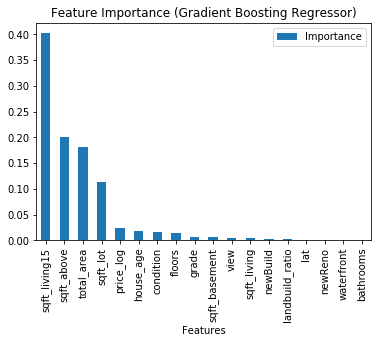

In [44]:
feature_imp_gbr = pd.DataFrame({'Features':houseprice_df.iloc[:,1:].columns,
                               'Importance':np.round(gbr_model.feature_importances_,3)})

#sort them in descending order 
feature_imp_gbr = feature_imp_gbr.sort_values('Importance',ascending=False).set_index('Features'
                                                                                     )
#show the top 10 features 
feature_imp_gbr.head(10)
feature_imp_gbr.plot.bar()
plt.title("Feature Importance (Gradient Boosting Regressor)")

### Is it possible to say something about which features the model considers important?
Based on the bar graph above, it shows the Ranking of Features Importance for Gradient Boosting Regressor to see the usefulnees of the feature in the model prediction.

It shows that sqft_living15, sqft_above and total_area features have the highest ranking among all the features. Besides, it shows that there's a big difference between the importance rate of sqft_living15 and sqft_above as sqft_living15 has a higher importance rate compared to sqft_above

Thus, sqft_living15, sqft_above and total_area play an important role in the Gradient Boosting Regressor model prediction, thus they are considered as important.

### Random Forest 

###### Cross Validation

In [80]:
#Cross validation to check overfitting

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

#compute the score 5 consecutive times with different splits 
scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring = "r2")

print("Scores:", scores_rf)
#average of accuracy 
print("Mean:", scores_rf.mean()) 
print("Standard Deviation:", scores_rf.std())

Scores: [0.8298162  0.82114056 0.82550713 0.83256092 0.83715491]
Mean: 0.8292359438268233
Standard Deviation: 0.005541506275639506


Cross Validation is carried out here to ensure that there is no overfitting or underfitting issues.

After the cross-validation process for 5 k folds, it found out that the scores for each fold are consistent and Random Forest Regressor has an average accuracy of 82.92% from the cross-validation score with a standard deviation of 0.05 

This shows that the accuracy of Random Forest Regressor may differ plus or minus 0.005

According to the trained model above, Random Forest Regressor has scored 82.92% which is very close to 84%. This shows that Random Forest Regressor model is not either overfitted or underfitted.

###### Hyperparameter Tuning - Random Forest 

### Did you try to tune the hyperparameters of the learning algorithm, and in that case how?
1. Use RandomizedSearchCV to generate candidates from the grid of parameters to evaluate 
2. Tune the model again with the parameter values given.
3. Cross Validation and show the model score to see if there is any underfitting or overfitting issues.

Steps are as below: 

In [81]:
from sklearn.model_selection import RandomizedSearchCV

#use gridsearch to find the best params 
random_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [2,5,10,30],
    'min_samples_split': [2, 4, 6],
    "min_samples_leaf" : [1, 5, 10]
}

grid_search_rf = RandomizedSearchCV(estimator=rf_model,param_distributions = random_grid, cv=10,scoring='r2')

rf_model = grid_search_rf.fit(X, y)

In [82]:
#print out the best model parameters 
print(rf_model.best_params_)

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 30}


In [83]:
rf_hp= RandomForestRegressor(n_estimators=200,
                             max_depth= 30,
                             min_samples_split=2,
                             min_samples_leaf=5,)
rf_hp.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_hp, X_train, y_train, cv=10, scoring = "r2")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.85499399 0.84491734 0.84796275 0.84008249 0.84431771 0.83832339
 0.85650571 0.84818787 0.85384754 0.85369475]
Mean: 0.848283354555267
Standard Deviation: 0.006053978294143586


In [84]:
y_hat_rf_hp_train= rf_hp.predict(X_train)
y_hat_rf_hp_test= rf_hp.predict(X_test)

# Accuracy score for train set
score = r2_score(y_train, y_hat_rf_hp_train)
print("r2 score for the train set={:.2f}%".format(score*100))

# Accuracy score for test set
score = r2_score(y_test, y_hat_rf_hp_test)
print("r2 score for the test set={:.2f}%".format(score*100))

r2 score for the train set=93.02%
r2 score for the test set=85.31%


Return the best params and did cross validation with 10 folds again to ensure no overfitting or underfitting. 

It shows that the mean score is 0.85 with standard deviation of 0.006  

The r2 score for train set for the tuned model is 93.02% while r2 score for test set is 85.31%
Based on the Random Forest Regressor model, the original test score before hyperparameter tuning was 84%. There is an increase of 1.31% in the r2 score of test set. 

This indicates that the tuned Random Forest Regressor model has the ability to fit 85.31% of the data correctly. 

Text(0.5, 1.0, 'Feature Importance (Random Forest Regressor)')

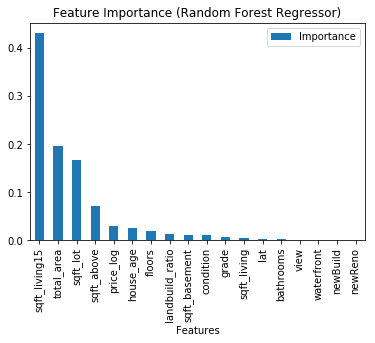

In [86]:
feature_imp_rf = pd.DataFrame({'Features':houseprice_df.iloc[:,1:].columns,
                               'Importance':np.round(rf_hp.feature_importances_,3)})

#sort them in descending order 
feature_imp_rf = feature_imp_rf.sort_values('Importance',ascending=False).set_index('Features'
                                                                                     )
#show the top 10 features 
feature_imp_rf.head(10)
feature_imp_rf.plot.bar()
plt.title("Feature Importance (Random Forest Regressor)")

### Is it possible to say something about which features the model considers important?

Based on the bar graph above, it shows the Ranking of Features Importance for Random Forest Regressor to see the usefulnees of the feature in the model prediction.

It shows that sqft_living15, total_area, sqft_lot and sqft_above features have the highest ranking among all the features. Besides, it shows that there's a big difference between the importance rate of sqft_living15 and total_area as sqft_living15 has a higher importance rate compared to total_area

Thus, sqft_living15, total_area and sqft_lot play an important role in the Random Forest Regressor model prediction, thus they are considered as important.

## Best Model

Based on the analysis above, Gradient Boosting Regressor has a smaller value of Mean Absolute Error, Mean Squared Error and Root Mean Squared Error, which means it has a smaller average magnitude of the errors in a set of predictions. 

Besides, it has a R2 score of 0.86 for train set and 0.85 for test set. This shows that the model is neither underfitted nor overfitted as the difference of both scores is just 0.01 while the R2 score difference in Random Forest Regressor is 7.71

Hence, I will choose Gradient Boosting Regressor as the best model to predict King County House Price in this dataset. 

### How well does your system compare to a stupid baseline?

Stupid baseline is where the all the house prices are the overall average house price which is impossible. The accuracy of the stupid baseline is around 50%. While for the model that I've created, it determines the price of the house based on the features that are being implemented in the model. In the stupid baseline, r2_score will be 0 because it is fixed at constant value and does not change with any input features. The r2 score of the trained models (system) are above 80% which means the models are able to predict the at least 80% of house price correctly.

### Can you say anything about the errors that the system makes?

Since I have decided to choose Gradient Boosting Regressor as the best model, I am going to talk about it here. 

In GBR, Mean Absolute Error (MAE) is printed out to measure the average magnitude of the errors in a set of predictions. It shows that the value of MAE is 0.139. 

Besides, Root Mean Squared Error (RMSE) is also printed out to measure the average magnitude of the error and it has the value of 0.188

Since both MAE and RMSE are negatively-oriented scores, which means the lower values are better.

# Conclusion 

In this King County House Price dataset, I have found out different factors that might affect the price of the house through exploratory data analysis. 

Firstly, I found that the price of the house can be affected by the amount of square footage of the house interior living space as well as the land space as ‘sqft_living’ has a high correlation with the price in this dataset. Hence, we can say that the higher the square footage, the higher the house prices. 

Besides, the house prices can also be affected by the number of bathrooms, floors and bedrooms in the house. Not only that, the overall quality level of construction and design of the house may affect the price as well. With that saying, a house with a better condition will have a higher house price.

On the other hand, location of the house may affect the house price as well. According to the data exploration that I have done, I found out that houses located along the coast in the Midwest region of Seattle and Bellevue in King County have the highest house price compared to others. This might also indicate that the houses that have a waterfront view will have higher house price as well.

After exploring on the data, I have built some algorithm machine learning models to the house price in King County and the top two models with the highest R2 test score are Gradient Boosting Regressor and Random Forest Regressor. After doing hyperparameter tuning for the top models, I would choose Gradient Boosting Regressor as the best model. This is because Gradient Boosting Regressor has achieved an accuracy of 85% for r2 test score. Not only that, it has the lowest value of RMSE and MSE which means that this model has made the least error. 


# References 

https://medium.com/data-science-everywhere/linear-regression-in-python-28dbe9674e36

https://datascience.quantecon.org/applications/regression.html

https://medium.com/@gurupratap.matharu/end-to-end-machine-learning-project-on-predicting-housing-prices-using-regression-7ab7832840ab

https://www.slideshare.net/PawanShivhare1/predicting-king-county-house-prices

https://medium.com/analytics-vidhya/predicting-house-prices-using-classical-machine-learning-and-deep-learning-techniques-ad4e55945e2d

https://www.curiousily.com/posts/predicting-house-prices/

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

https://chrisbronner.com/2018/12/03/house-sales-in-king-county/